1/1 [==============================] - 1s 1s/step


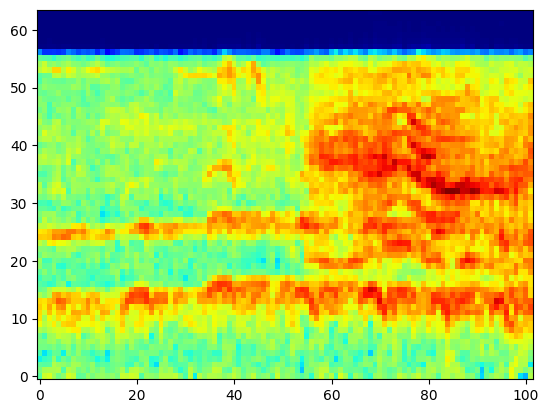

Current event:
  Opera       : 0.125
  Classical music: 0.066
  Inside, large room or hall: 0.058
  Animal      : 0.037
  Speech      : 0.027
0
1/1 [==============================] - 0s 74ms/step


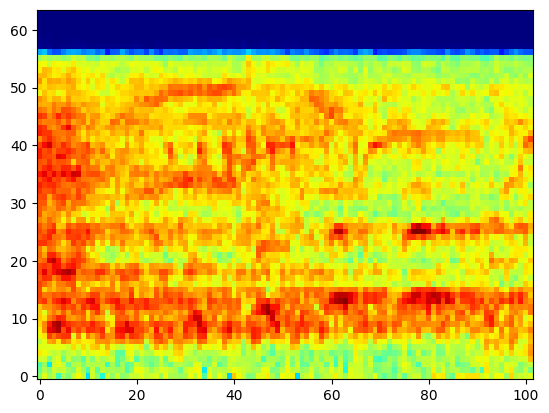

Current event:
  Laughter    : 0.283
  Snicker     : 0.227
  Speech      : 0.158
  Chuckle, chortle: 0.125
  Screaming   : 0.061
1
1/1 [==============================] - 0s 19ms/step


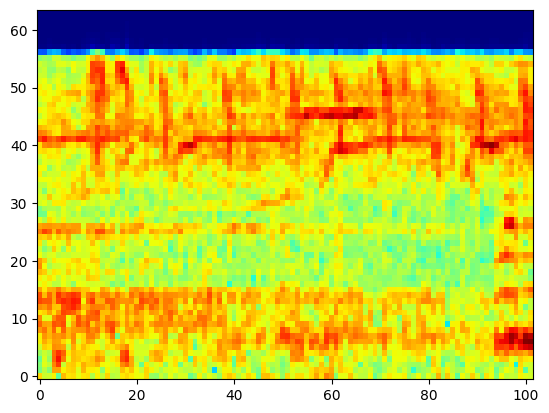

Current event:
  Gurgling    : 0.139
  Water       : 0.111
  Music       : 0.084
  Whale vocalization: 0.076
  Toilet flush: 0.047
2
1/1 [==============================] - 0s 18ms/step


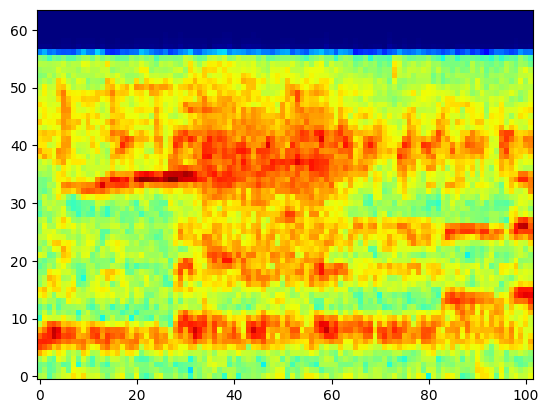

Current event:
  Alarm clock : 0.264
  Animal      : 0.116
  Inside, small room: 0.061
  Domestic animals, pets: 0.053
  Gobble      : 0.043
3
1/1 [==============================] - 0s 19ms/step


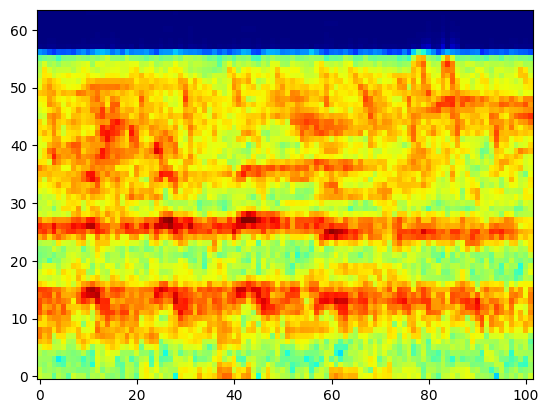

Current event:
  Bird        : 0.781
  Animal      : 0.778
  Wild animals: 0.768
  Bird vocalization, bird call, bird song: 0.470
  Chirp, tweet: 0.326
4
1/1 [==============================] - 0s 19ms/step


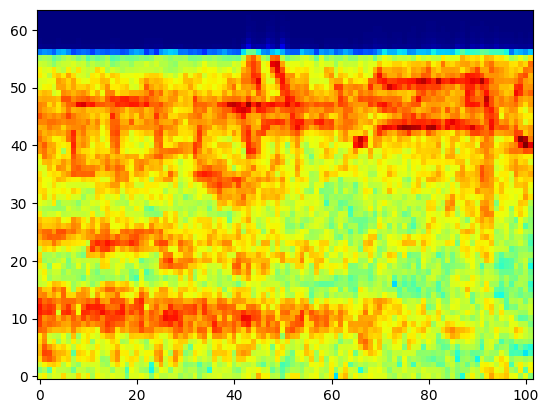

Current event:
  Animal      : 0.511
  Pig         : 0.187
  Wild animals: 0.157
  Bird        : 0.139
  Livestock, farm animals, working animals: 0.129
Saved animal sound to animal_sounds/animal_sound_5.wav
5
1/1 [==============================] - 0s 41ms/step


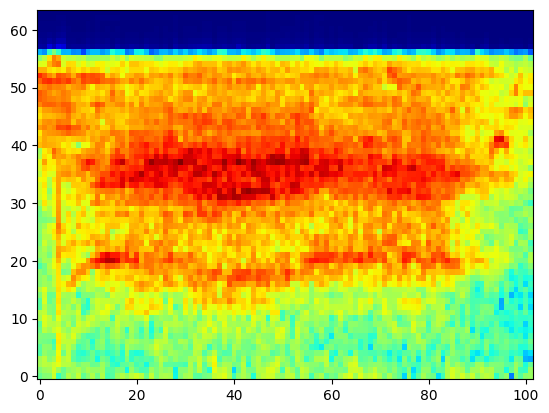

Current event:
  Livestock, farm animals, working animals: 0.869
  Animal      : 0.847
  Pig         : 0.369
  Goat        : 0.255
  Bleat       : 0.203
6
1/1 [==============================] - 0s 20ms/step


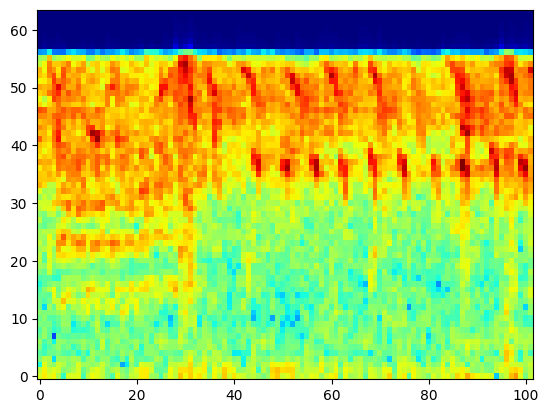

Current event:
  Animal      : 0.787
  Bird        : 0.726
  Wild animals: 0.675
  Bird vocalization, bird call, bird song: 0.518
  Chirp, tweet: 0.379
Saved animal sound to animal_sounds/animal_sound_7.wav
7
1/1 [==============================] - 0s 18ms/step


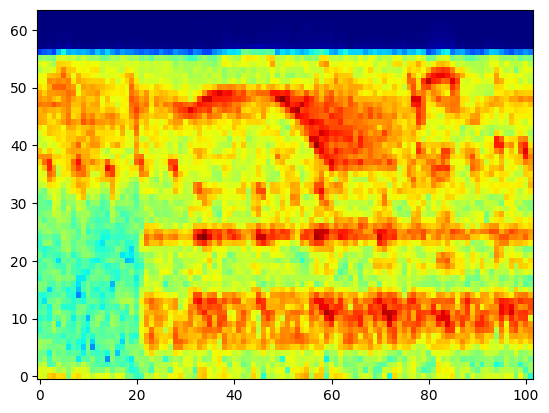

Current event:
  Animal      : 0.655
  Bird        : 0.539
  Wild animals: 0.508
  Bird vocalization, bird call, bird song: 0.261
  Pigeon, dove: 0.225
Saved animal sound to animal_sounds/animal_sound_8.wav
8
1/1 [==============================] - 0s 19ms/step


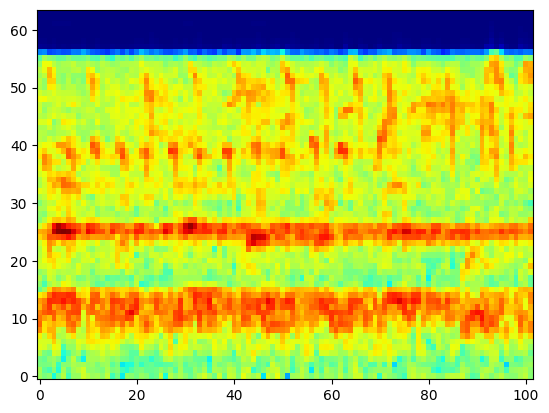

Current event:
  Gurgling    : 0.347
  Water       : 0.177
  Toilet flush: 0.090
  Sound effect: 0.075
  Liquid      : 0.064
9
1/1 [==============================] - 0s 337ms/step


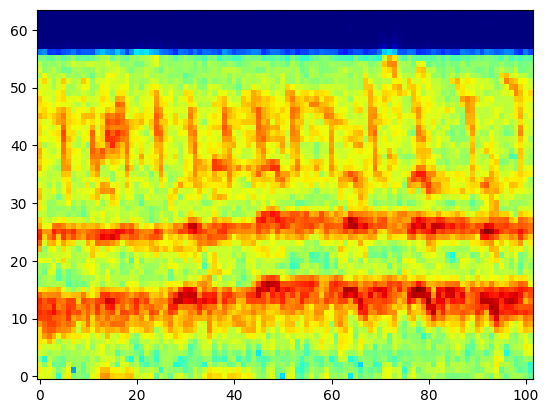

Current event:
  Inside, small room: 0.061
  Wild animals: 0.059
  Animal      : 0.059
  Sound effect: 0.048
  Bird        : 0.041
10
1/1 [==============================] - 0s 21ms/step


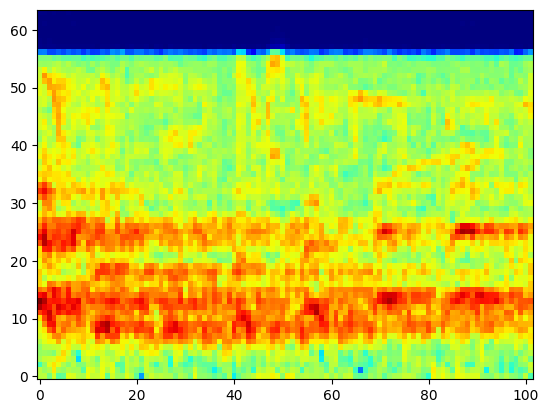

Current event:
  Gargling    : 0.221
  Gurgling    : 0.043
  Burping, eructation: 0.041
  Animal      : 0.024
  Water       : 0.022
11
1/1 [==============================] - 0s 22ms/step


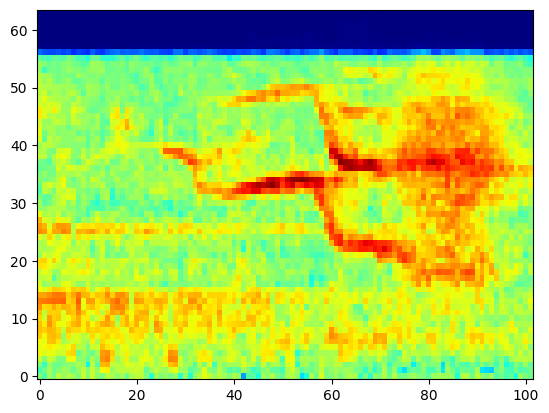

Current event:
  Animal      : 0.630
  Bird        : 0.456
  Wild animals: 0.367
  Chicken, rooster: 0.230
  Fowl        : 0.183
Saved animal sound to animal_sounds/animal_sound_12.wav
12


In [4]:
import os
import soundfile as sf
import yamnet.params as params
import yamnet.yamnet as yamnet_model
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Directory to save animal sound files
output_dir = "animal_sounds"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Load YAMNet model
yamnet = yamnet_model.yamnet_frames_model(params)
yamnet.load_weights('yamnet/yamnet.h5')
yamnet_classes = yamnet_model.class_names('yamnet/yamnet_class_map.csv')

frame_len = int(params.SAMPLE_RATE * 1)  # 1sec

# Read the whole audio file
filename = 'test.wav'
data, sr = librosa.load(filename, sr=params.SAMPLE_RATE)

# Split the audio data into 1 second chunks
chunks = np.array_split(data, len(data) // frame_len)

plt.ion()
for cnt, frame_data in enumerate(chunks):
    # model prediction
    scores, melspec = yamnet.predict(np.reshape(frame_data, [1, -1]), steps=1)
    prediction = np.mean(scores, axis=0)

    # visualize input audio
    plt.imshow(melspec.T, cmap='jet', aspect='auto', origin='lower')
    plt.pause(0.001)
    plt.show()

    top5_i = np.argsort(prediction)[::-1][:5]

    # print result
    print('Current event:\n' +
          '\n'.join('  {:12s}: {:.3f}'.format(yamnet_classes[i], prediction[i])
                    for i in top5_i))

    # If the top prediction is 'Animal', save the audio segment
    if yamnet_classes[top5_i[0]] == 'Animal':
        output_filename = os.path.join(output_dir, f"animal_sound_{cnt}.wav")
        sf.write(output_filename, frame_data, params.SAMPLE_RATE)
        print(f"Saved animal sound to {output_filename}")

    # print idx
    print(cnt)



In [45]:
import numpy as np
import tensorflow as tf
import librosa
import base64
import io
import json
from google.cloud import storage

# Make sure to use the correct configuration, here is a sample.
config = {
    'AUDIO_SAMPLE_RATE': 16000,
    'AUDIO_CLIP_DURATION': 5,
    'AUDIO_NFFT': 400,
    'AUDIO_STRIDE': 160,
    'AUDIO_MELS': 64,
    'AUDIO_FMIN': 50,
    'AUDIO_FMAX': 6000,
    'AUDIO_WINDOW': 400,
    'AUDIO_TOP_DB': 60,
    'MODEL_INPUT_IMAGE_CHANNELS': 3,
    'MODEL_INPUT_IMAGE_WIDTH': 260,
    'MODEL_INPUT_IMAGE_HEIGHT': 260
}

"""
# Function to load the class names
def load_class_names():
    # Load your class names here. The format should be similar to how it was done in the original code.
    # Assuming you have class names saved in a text file, one name per line.
    with open('class_names.txt', 'r') as f:
        class_names = [line.strip() for line in f]
    return class_names

class_names = load_class_names()
"""
class_names= ['Aegotheles cristatus owlet-nightjar', 'Alauda arvensis European Skylark', 'Caligavis chrysops Yellow-faced honeyeater', 'Capra hircus Feral goat', 'Cervus unicolour Sambar deer', 'Colluricincla harmonica Grey shrikethrush', 'Corvus coronoides Australian raven',
              'Dama dama Fallow Deer', 'Eopsaltria australis Eastern yellow robin', 'Felis Catus Cat', 'Pachycephala rufiventris Rufous whistler', 'Ptilotula penicillata White-plumed honeyeater', 'Rattus norvegicus Brown rat', 'Strepera graculina Pied currawong', 'sus scrofa Wild pig']

# Load the model
model = tf.keras.models.load_model('models/echo_model/1/')

# Define the preprocessing steps as functions.



#####################################################################################
    # this function is adapted from generic_engine_pipeline.ipynb
    # TODO: need to create a pipeline library and link same code into engine
    ########################################################################################
def combined_pipeline(config, audio_clip):
    # Create a file-like object from the bytes.
    file = io.BytesIO(audio_clip)
    #file=audio_clip

    # Load the audio data with librosa
    audio_clip, sample_rate = librosa.load(file, sr=config['AUDIO_SAMPLE_RATE'])
        
    # keep right channel only
    if audio_clip.ndim == 2 and audio_clip.shape[0] == 2:
        audio_clip = audio_clip[1, :]
        
    # cast to float32 type
    audio_clip = audio_clip.astype(np.float32)
        
    # analyse a random 5 second subsection
    audio_clip = load_random_subsection(audio_clip, duration_secs=config['AUDIO_CLIP_DURATION'])

    # Compute the mel-spectrogram
    image = librosa.feature.melspectrogram(
        y=audio_clip, 
        sr=config['AUDIO_SAMPLE_RATE'], 
        n_fft=config['AUDIO_NFFT'], 
        hop_length=config['AUDIO_STRIDE'], 
        n_mels=config['AUDIO_MELS'],
        fmin=config['AUDIO_FMIN'],
        fmax=config['AUDIO_FMAX'],
        win_length=config['AUDIO_WINDOW'])

    # Optionally convert the mel-spectrogram to decibel scale
    image = librosa.power_to_db(
        image, 
        top_db=config['AUDIO_TOP_DB'], 
        ref=1.0)
        
    # Calculate the expected number of samples in a clip
    expected_clip_samples = int(config['AUDIO_CLIP_DURATION'] * config['AUDIO_SAMPLE_RATE'] / config['AUDIO_STRIDE'])
        
    # swap axis and clip to expected samples to avoid rounding errors
    image = np.moveaxis(image, 1, 0)
    image = image[0:expected_clip_samples,:]
        
    # reshape into standard 3 channels to add the color channel
    image = tf.expand_dims(image, -1)
        
    # most pre-trained model classifer model expects 3 color channels
    image = tf.repeat(image, config['MODEL_INPUT_IMAGE_CHANNELS'], axis=2)
        
    # calculate the image shape and ensure it is correct
    expected_clip_samples = int(config['AUDIO_CLIP_DURATION'] * config['AUDIO_SAMPLE_RATE'] / config['AUDIO_STRIDE'])
    image = tf.ensure_shape(image, [expected_clip_samples, config['AUDIO_MELS'], config['MODEL_INPUT_IMAGE_CHANNELS']])
        
    # note here a high quality LANCZOS5 is applied to resize the image to match model image input size
    image = tf.image.resize(image, (config['MODEL_INPUT_IMAGE_WIDTH'], config['MODEL_INPUT_IMAGE_HEIGHT']), 
                            method=tf.image.ResizeMethod.LANCZOS5)


    # rescale to range [0,1]
    image = image - tf.reduce_min(image) 
    image = image / (tf.reduce_max(image)+0.0000001)
        
    return image, audio_clip, sample_rate



 ########################################################################################
    # Function to predict class and probability given a prediction
    ########################################################################################
def predict_class( predictions):
    # Get the index of the class with the highest predicted probability
    predicted_index = int(tf.argmax(tf.squeeze(predictions)).numpy())
    print(predicted_index, type(predicted_index))

    # Get the class name using the predicted index
    predicted_class = self.class_names[predicted_index]
    # Calculate the predicted probability for the selected class
    predicted_probability = 100.0 * tf.nn.softmax(predictions)[predicted_index].numpy()
    # Round the probability to 2 decimal places
    predicted_probability = round(predicted_probability, 2)
    return predicted_class, predicted_probability

# this method takes in binary audio data and encodes to string
def audio_to_string( audio_binary):
    base64_encoded_data = base64.b64encode(audio_binary)
    base64_message = base64_encoded_data.decode('utf-8')
    return base64_message    


########################################################################################
    # this method takes in string and ecodes to audio binary data
    ########################################################################################
def string_to_audio( audio_string):
    base64_img_bytes = audio_string.encode('utf-8')
    decoded_data = base64.decodebytes(base64_img_bytes)
    return decoded_data
    
def predict_class(predictions):
    predicted_index = int(tf.argmax(tf.squeeze(predictions)).numpy())
    predicted_class = class_names[predicted_index]
    predicted_probability = 100.0 * tf.nn.softmax(predictions)[0, predicted_index].numpy()
    predicted_probability = round(predicted_probability, 2)
    return predicted_class, predicted_probability


def load_random_subsection(audio_clip, duration_secs):
    clip_length = len(audio_clip)
    subsection_length = duration_secs * config['AUDIO_SAMPLE_RATE']
    if clip_length > subsection_length:
        start_idx = np.random.randint(0, clip_length - subsection_length)
        return audio_clip[start_idx:start_idx+subsection_length]
    else:
        return audio_clip


def predict_on_audio(audio_binary):
    # Preprocess the audio to be suitable for your model
    image, audio_clip, sample_rate = combined_pipeline(config, audio_binary)
    
    # Add a dimension to match the model's input shape
    image = tf.expand_dims(image, 0)
    
    # Make the prediction
    predictions = model.predict(image)
    print(predictions.shape, predictions)

    
    # Predict class and probability using the prediction function
    predicted_class, predicted_probability = predict_class(predictions)
    
    print(f'Predicted class: {predicted_class}')
    print(f'Predicted probability: {predicted_probability}')
"""



# Now you can use predict_on_audio function to predict on your audio binary data.


"\n\n#this is for yamnet version:\ndef predict_on_audio(audio_file_path):\n    # Load the audio from the file path\n    audio_clip, sample_rate = librosa.load(audio_file_path, sr=config['AUDIO_SAMPLE_RATE'])\n    \n    # Preprocess the audio to be suitable for your model\n    image = preprocess_audio(audio_clip, sample_rate)\n    \n    # Add a dimension to match the model's input shape\n    image = tf.expand_dims(image, 0)\n    \n    # Make the prediction\n    predictions = model.predict(image)\n    \n    # Predict class and probability using the prediction function\n    predicted_class, predicted_probability = predict_class(predictions)\n    \n    return predicted_class, predicted_probability\n"

In [46]:
# Open the audio file in binary mode and read the data
with open('test.wav', 'rb') as f:
    audio_binary = f.read()

# Use the function with the binary data
predict_on_audio(audio_binary)

1/1 [==============================] - 2s 2s/step
(1, 15) [[ 0.3007714  -0.78364295  0.0705514   3.1499166   1.275682   -0.4220781
   1.0808797   1.6065086  -2.0149348   0.71677667 -1.4981817  -0.38596687
   2.540386   -2.6202579   1.9230105 ]]
Predicted class: Capra hircus Feral goat
Predicted probability: 38.21


/var/folders/tp/jx74xxwd0qgct2nvjkzx_m1h0000gn/T/ipykernel_15876/4073838848.py:20: UserWarning: PySoundFile failed. Trying audioread instead.
  data, sr = librosa.load(filename, sr=params.SAMPLE_RATE)
/Users/ankush/anaconda3/envs/new_env/lib/python3.8/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


16157
1/1 [==============================] - 1s 524ms/step


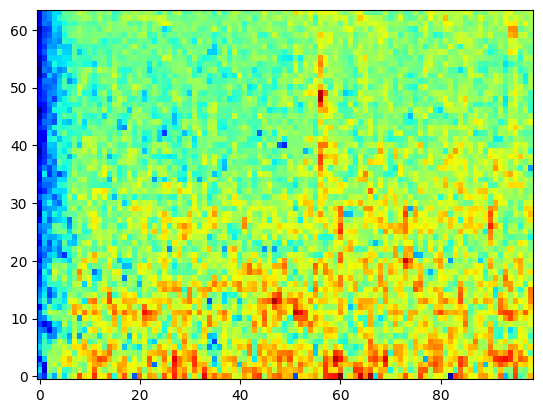

16157
1/1 [==============================] - 0s 28ms/step


/var/folders/tp/jx74xxwd0qgct2nvjkzx_m1h0000gn/T/ipykernel_15876/4073838848.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


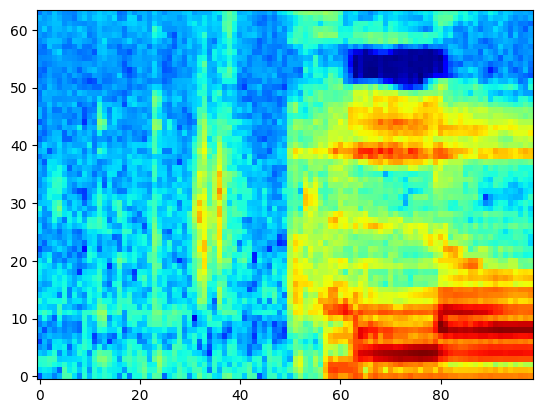

/var/folders/tp/jx74xxwd0qgct2nvjkzx_m1h0000gn/T/ipykernel_15876/4073838848.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


16156
1/1 [==============================] - 1s 532ms/step


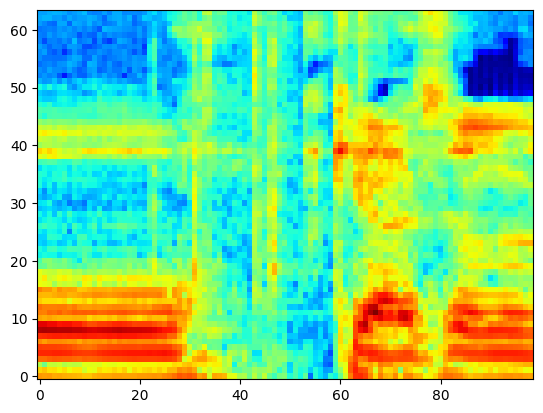

16156
1/1 [==============================] - 0s 35ms/step


/var/folders/tp/jx74xxwd0qgct2nvjkzx_m1h0000gn/T/ipykernel_15876/4073838848.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


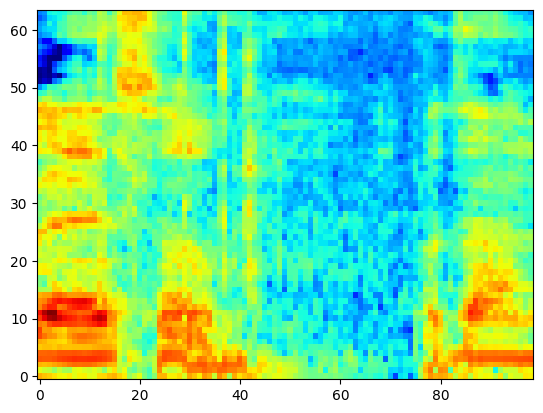

16156
1/1 [==============================] - 0s 35ms/step


/var/folders/tp/jx74xxwd0qgct2nvjkzx_m1h0000gn/T/ipykernel_15876/4073838848.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


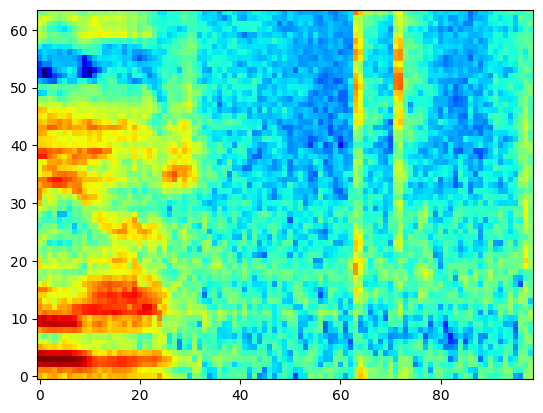

16156
1/1 [==============================] - 0s 40ms/step


/var/folders/tp/jx74xxwd0qgct2nvjkzx_m1h0000gn/T/ipykernel_15876/4073838848.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


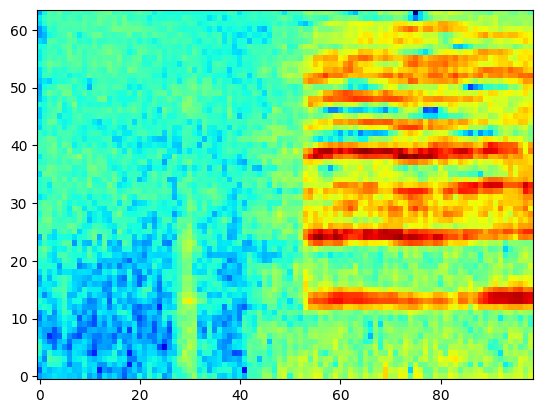

InvalidArgumentError: {{function_node __wrapped__EnsureShape_device_/job:localhost/replica:0/task:0/device:GPU:0}} Shape of tensor input [101,64,3] is not compatible with expected shape [500,64,3]. [Op:EnsureShape] name: 

In [59]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import yamnet.params as params
import yamnet.yamnet as yamnet_model
import librosa
import tempfile
from collections import defaultdict
# Load YAMNet model
yamnet = yamnet_model.yamnet_frames_model(params)
yamnet.load_weights('yamnet/yamnet.h5')
yamnet_classes = yamnet_model.class_names('yamnet/yamnet_class_map.csv')

frame_len = int(params.SAMPLE_RATE * 1)  # 1sec

# Read the whole audio file
filename = 'test.m4a'
data, sr = librosa.load(filename, sr=params.SAMPLE_RATE)

# Split the audio data into 1 second chunks
chunks = np.array_split(data, len(data) // frame_len)

# Dataframe to store the results
df = pd.DataFrame(columns=['start_time', 'end_time', 'yamnet_label', 'yamnet_probability', 'your_model_label', 'your_model_probability'])


plt.ion()
for cnt, frame_data in enumerate(chunks):
    print(len(frame_data))
    start_time = cnt
    end_time = cnt + 1

    # model prediction
    scores, melspec = yamnet.predict(np.reshape(frame_data, [1, -1]), steps=1)
    yamnet_prediction = np.mean(scores, axis=0)

    # visualize input audio
    plt.imshow(melspec.T, cmap='jet', aspect='auto', origin='lower')
    plt.pause(0.001)
    plt.show()

    top5_i = np.argsort(yamnet_prediction)[::-1][:5]

    # If the top prediction is 'Animal', save the audio segment and send it to your model
    if yamnet_classes[top5_i[0]] == 'Animal' and yamnet_prediction[top5_i[0]] > 0.3:
        # Pad the audio if it's shorter than 1 second
        if len(frame_data) < frame_len:
            padding = frame_len - len(frame_data)
            frame_data = np.pad(frame_data, (0, padding), 'constant')

        # Create a temporary file to store the frame data
        with tempfile.NamedTemporaryFile(suffix=".wav", delete=True) as temp_audio_file:
            sf.write(temp_audio_file.name, frame_data, params.SAMPLE_RATE)
            # Reload the audio file as a binary file
            with open(temp_audio_file.name, 'rb') as binary_file:
                # Get prediction from your model
                your_model_prediction, your_model_probability = predict_on_audio(binary_file.read())

            # Add the results to the DataFrame
            df = df.append({
                'start_time': start_time, 
                'end_time': end_time,
                'yamnet_label': 'Animal',
                'yamnet_probability': yamnet_prediction[top5_i[0]],
                'your_model_label': your_model_prediction,
                'your_model_probability': your_model_probability
            }, ignore_index=True)
# ...

    else:
        # Add the results to the DataFrame
        df = df.append({
            'start_time': start_time, 
            'end_time': end_time,
            'yamnet_label': yamnet_classes[top5_i[0]],
            'yamnet_probability': yamnet_prediction[top5_i[0]],
            'your_model_label': None,
            'your_model_probability': None
        }, ignore_index=True)

# print the DataFrame
print(df)

In [58]:
df

,start_time,end_time,yamnet_label,yamnet_probability,your_model_label,your_model_probability
0,0,1,Silence,1.000000,None,None
1,1,2,Speech,0.961593,None,None
2,2,3,Speech,0.988998,None,None
3,3,4,Speech,0.954703,None,None
4,4,5,Speech,0.948518,None,None
